<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/Machine_learning_for_prediction_of_solid_solubility%2Cfinding_relative_importance_in_binary_alloy_sysetms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


# Read in data and display first 5 rows
features = pd.read_excel('/content/drive/MyDrive/Mtech project/akhil data with HM2.xlsx')
features.head(5)
features=features.dropna()
feature=features.reset_index(drop=True)
print('The shape of our features is:', features.shape)

The shape of our features is: (2642, 33)


In [ ]:
features.head()

,Element A,Atomic number,Atomic radius (pm),Atomic weight,Crystal structure (RT),Cohesive energy (eV/atom),Density (g/cc),electronegativity,Valence,Melting point K,...,Atomic size factor2,Melting point factor,electronegativity diff,electronegativity diff2,Valence Diff,Abs Valence diff,Atomic weight factor,Density factor,crystal structure weightage factor,Modified solubility and crystal structure factor
0,Ag,47,144,107.8682,FCC,2.95,10.49,1.93,1,1234.93,...,5.263158,63.265124,0.95,0.95,0,0,93.566222,94.899905,74.0,45.06600
1,Ag,47,144,107.8682,FCC,2.95,10.49,1.93,1,1234.93,...,42.629482,74.698971,1.11,1.11,0,0,20.766454,85.395615,74.0,0.00000
2,Ag,47,144,107.8682,FCC,2.95,10.49,1.93,1,1234.93,...,6.250000,44.770572,0.35,-0.35,-5,5,4.600707,15.742972,100.0,0.00000
3,Ag,47,144,107.8682,FCC,2.95,10.49,1.93,1,1234.93,...,20.833333,20.837821,0.36,0.36,-1,1,91.645190,82.383222,90.2,0.32472
4,Ag,47,144,107.8682,FCC,2.95,10.49,1.93,1,1234.93,...,18.750000,26.797273,0.03,0.03,-3,3,73.963596,77.788370,15.9,0.00000


In [ ]:
features.columns

Index(['Element A', 'Atomic number', 'Atomic radius (pm)', 'Atomic weight',
       'Crystal structure (RT)', 'Cohesive energy (eV/atom)', 'Density (g/cc)',
       'electronegativity', 'Valence', 'Melting point K', 'Element B',
       'Atomic number2', 'Atomic radius (pm)2', 'Atomic weight2',
       'Crystal structure (RT)2', 'Cohesive energy (eV/atom)2', 'Density2',
       'electronegativity2', 'Valence2', 'Melting point K2', 'Solubility',
       'Heat of mixing', 'Atomic size factor', 'Atomic size factor2',
       'Melting point factor', 'electronegativity diff',
       'electronegativity diff2', 'Valence Diff', 'Abs Valence diff',
       'Atomic weight factor', 'Density factor',
       'crystal structure weightage factor',
       'Modified solubility and crystal structure factor'],
      dtype='object')

In [ ]:
features=features[['Solubility','Atomic size factor2',
       'electronegativity diff', 'Abs Valence diff',
        'Heat of mixing',
       'crystal structure weightage factor']]

In [ ]:
features.rename(columns={'Max Solubility (DH)':'Solubility'}, inplace=True)

In [ ]:
print(features.sort_values("Solubility"))

      Solubility  Atomic size factor2  electronegativity diff  \
1057         0.0            17.582418                    0.76   
1304         0.0            27.745665                    0.88   
2565         0.0             6.043956                    0.66   
1302         0.0            28.323699                    0.83   
1301         0.0            35.260116                    0.55   
...          ...                  ...                     ...   
1106       100.0             1.704545                    0.23   
1107       100.0             9.090909                    0.13   
1164       100.0             8.148148                    0.37   
2585       100.0             1.136364                    0.02   
2122       100.0            11.111111                    0.16   

      Abs Valence diff  Heat of mixing  crystal structure weightage factor  
1057                 1           -43.0                                20.0  
1304                 1           -27.0                           

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Solubility'])

In [ ]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['Solubility'])
# Remove the labels from the features
# axis 1 refers to the columns
feature= features.drop('Solubility', axis = 1)
# Saving feature names for later use
feature_list = list(feature.columns)
# Convert to numpy array
feature = np.array(feature)

In [ ]:
X=features[['Solubility','Atomic size factor2',
       'electronegativity diff', 'Abs Valence diff',
        'Heat of mixing',
       'crystal structure weightage factor']]##'BCC','FCC','HCP','OTHER',
#y=labels

,Solubility,Atomic size factor2,electronegativity diff,Abs Valence diff,Heat of mixing,crystal structure weightage factor
Solubility,1.00,-0.51,-0.30,-0.16,0.05,0.31
Atomic size factor2,-0.51,1.00,0.42,0.01,-0.01,-0.10
electronegativity diff,-0.30,0.42,1.00,0.18,-0.51,-0.07
Abs Valence diff,-0.16,0.01,0.18,1.00,0.09,-0.05
Heat of mixing,0.05,-0.01,-0.51,0.09,1.00,0.19
crystal structure weightage factor,0.31,-0.10,-0.07,-0.05,0.19,1.00


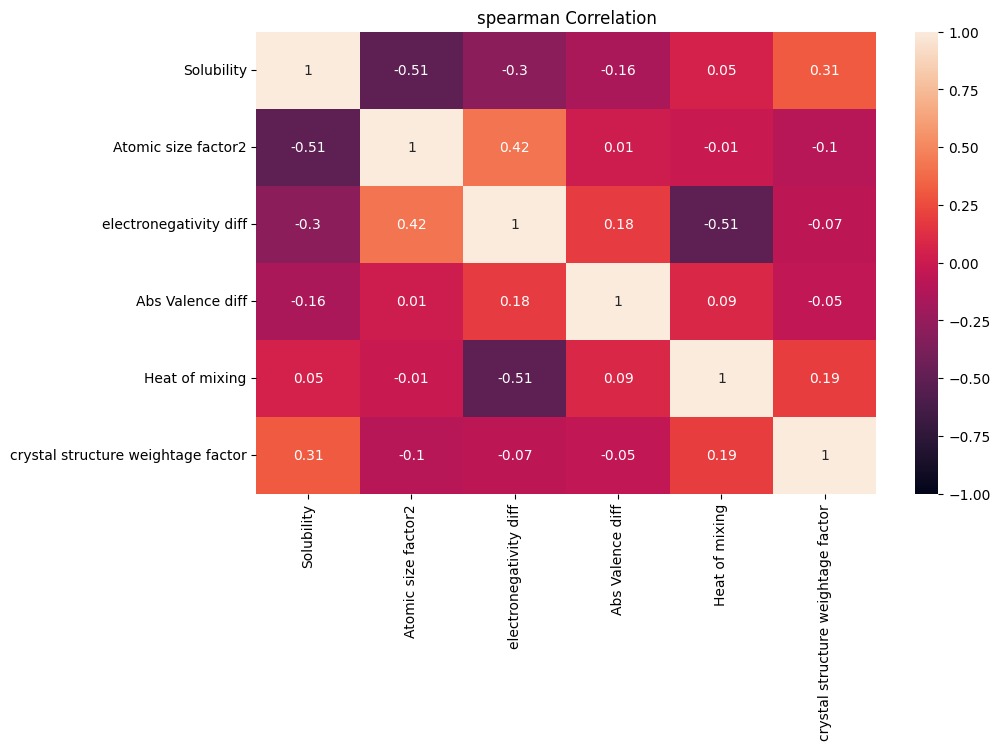

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
def display_correlation(df):
    r = df.corr(method="spearman").round(2)
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(method="spearman").round(2), vmin=-1,
                      vmax=1, annot=True)
    plt.title("spearman Correlation")
    return(r)
display_correlation(X)

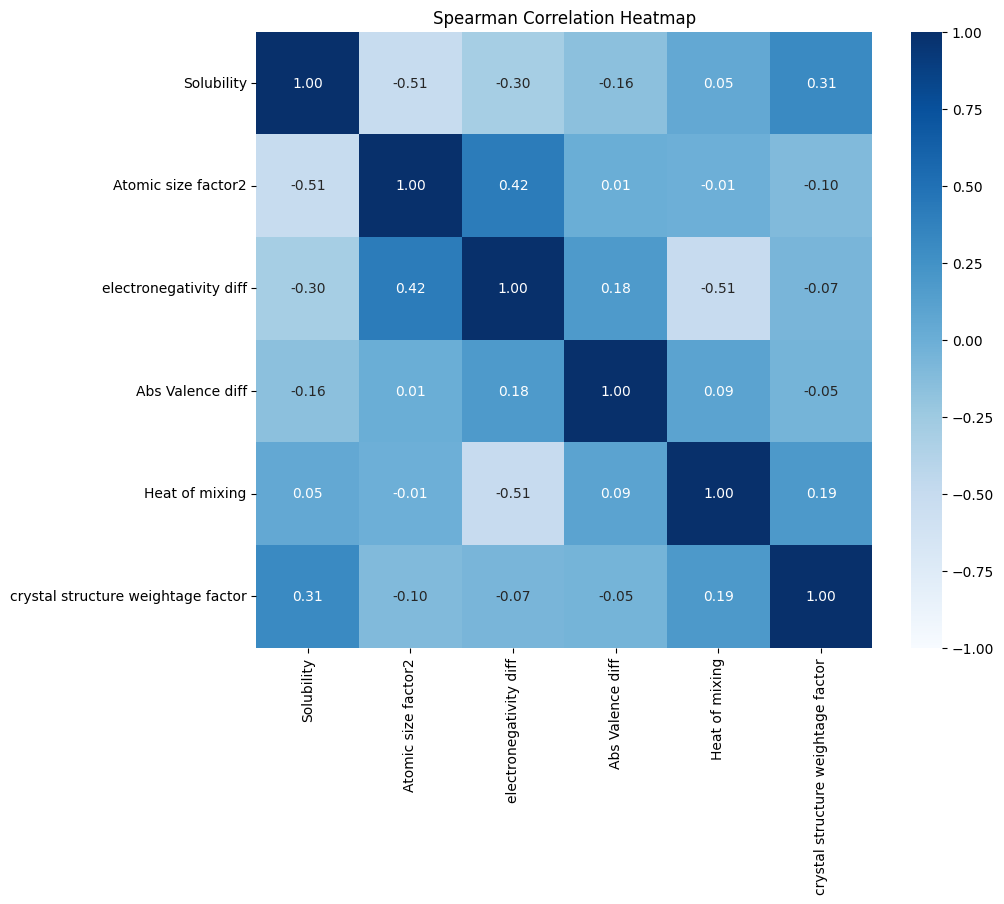

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# # Create a sample dataset
# data = pd.DataFrame({
#     'A': [1, 2, 3, 4, 5],
#     'B': [5, 4, 3, 2, 1],
#     'C': [2, 4, 6, 8, 10],
#     'D': [10, 8, 6, 4, 2]
# })

# Calculate the Spearman correlation matrix
corr_matrix = X.corr(method='spearman')

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True,vmin=-1,
                      vmax=1,)

# Set the title and display the plot
plt.title('Spearman Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# random_seed = 42
# np.random.seed(random_seed)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(feature, labels, test_size = 0.25, random_state = 0)#random_seed
# Transforming data
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1981, 5)
Training Labels Shape: (1981,)
Testing Features Shape: (661, 5)
Testing Labels Shape: (661,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf =RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=556)
# Train the model on training data
rf.fit(train_features, train_labels);

In [ ]:
# cross_validate also allows to specify metrics which you want to see
for i, score in enumerate(cross_validate(rf, test_features,test_labels, cv=5)["test_score"]):
    print(f"Accuracy for the fold no. {i} on the test set: {score}")

Accuracy for the fold no. 0 on the test set: 0.48714245396195033
Accuracy for the fold no. 1 on the test set: 0.7735944697270077
Accuracy for the fold no. 2 on the test set: 0.6948879479292478
Accuracy for the fold no. 3 on the test set: 0.6176282501520306
Accuracy for the fold no. 4 on the test set: 0.6204173584410368


In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 5.23 degrees.


In [ ]:
predictions_train = rf.predict(train_features)

In [ ]:
mean_squared_error(train_labels, predictions_train)

22.03209527421751

In [ ]:
mean_squared_error(test_labels, predictions)

135.70580232174296

In [ ]:
r2_score(train_labels, predictions_train)

0.9622381578636009

In [ ]:
r2_score(test_labels, predictions)

0.7259277237382487

<ipython-input-30-add541f7fceb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(train_labels, hist=False, color="r", label="Actual Value")
<ipython-input-30-add541f7fceb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions_train, hist=False, color="b", label="Fi

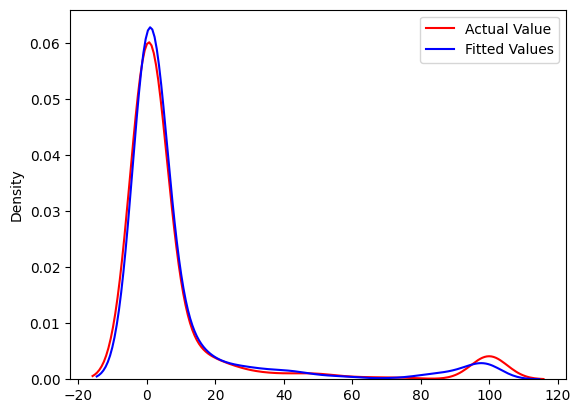

In [ ]:
import seaborn as sns

ax1 = sns.distplot(train_labels, hist=False, color="r", label="Actual Value")
sns.distplot(predictions_train, hist=False, color="b", label="Fitted Values",ax=ax1 )
plt.legend()
plt.show()

<ipython-input-31-56bc30973f25>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
<ipython-input-31-56bc30973f25>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, hist=False, color="b", label="Fitted Va

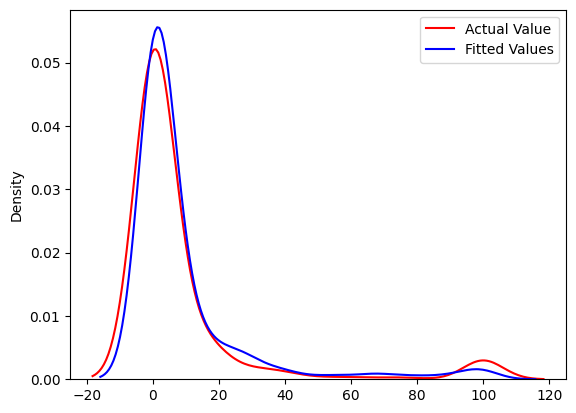

In [ ]:
import seaborn as sns

ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values",ax=ax1 )
plt.legend()
plt.show()

<Axes: >

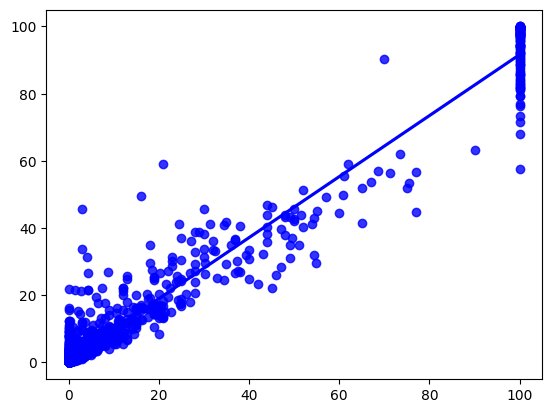

In [ ]:
sns.regplot(x=train_labels, y=predictions_train, ci=None, color="b")

<Axes: >

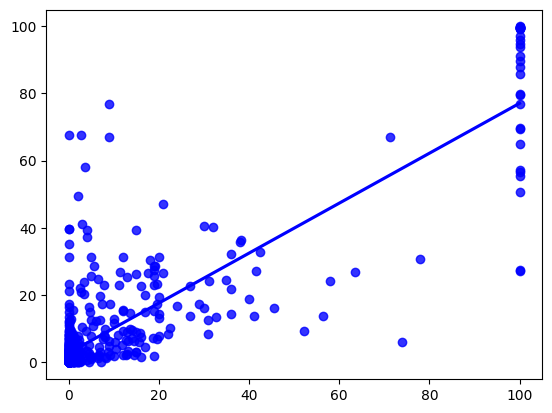

In [ ]:
sns.regplot(x=test_labels, y=predictions, ci=None, color="b")

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Atomic size factor2  Importance: 0.31
Variable: crystal structure weightage factor Importance: 0.26
Variable: Heat of mixing       Importance: 0.19
Variable: electronegativity diff Importance: 0.14
Variable: Abs Valence diff     Importance: 0.1


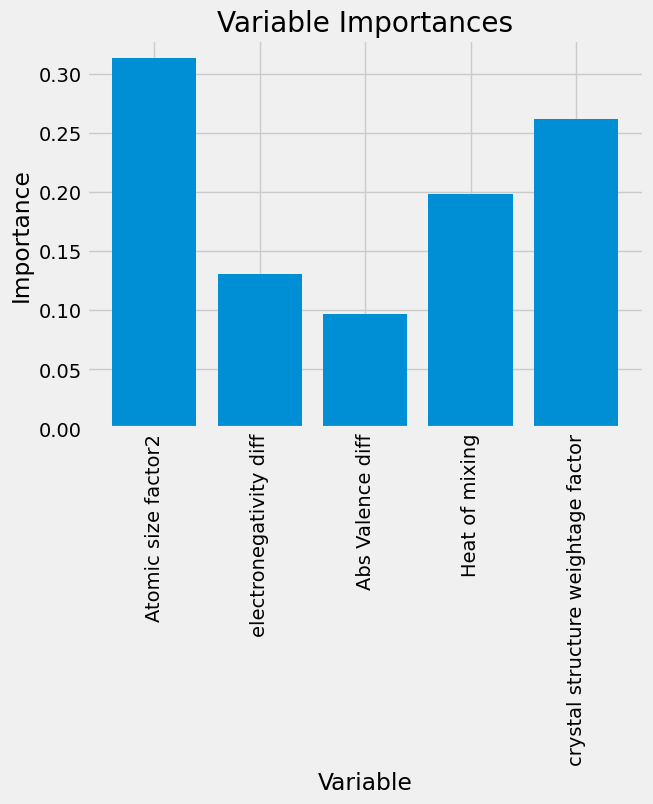

In [ ]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 0)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5,6,7,8,9,10,11,12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8,10,12]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 8, 10, 12],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'n_estimators': [1, 112, 223, 334, 445, 556, 667, 778, 889, 1000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=32, n_jobs = -1)
# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=500,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8, 10,
                                                             12],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11,
                                                              12],
                                        'n_estimators': [1, 112, 223, 334, 445,
                                                         556, 667, 778, 889,
                                                         1000]},
                   random_state=32, verbose=2)

In [ ]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=16, max_features='sqrt',
                      min_samples_split=6, n_estimators=556)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [False],
    'max_depth': [2, 10],
    'max_features': [2, 8],
    'min_samples_leaf': [2, 8],
    'min_samples_split': [2, 6],
    'n_estimators': [10, 20, 30, 40, 50,100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [2, 10],
                         'max_features': [2, 8], 'min_samples_leaf': [2, 8],
                         'min_samples_split': [2, 6],
                         'n_estimators': [10, 20, 30, 40, 50, 100]},
             verbose=2)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
rf = RandomForestRegressor(
                           n_estimators = grid_search.best_params_['n_estimators'],
                           max_features = grid_search.best_params_['max_features'],
                           max_depth = grid_search.best_params_['max_depth'],
                           random_state = 0)

rf.fit(train_features, train_labels)

n_scores = cross_val_score(rf, train_features, train_labels,
                           cv=KFold(n_splits=5, shuffle=True, random_state=1)).mean()

In [ ]:
n_scores

0.6187102345408378

In [ ]:
grid_search.score(test_features,test_labels)

0.7311667590396631